# Predict if the client will subscribe to a term deposit

#### Table of Contents

#### Data Exploration
 - Read the data and identify data issues such as null values, duplicates, zeros, etc.
 
#### Data Visualization
 - Plot histograms, bars and find outliers, correlations, etc.

#### Data Preparation
 - Clean the data issues previously identified, such as nulls, duplicates and get rid of outliers.
 
#### Data Encoding
 - Depends on the scenario, choose techniques such as binary or label encoding to handle categorical variables.

#### Feature Selection
 - Use appropriate selection techniques such as Lasso, Ridge, etc. to identify the minimalistic and impactful features.
 
#### Modeling
 - Create classifier models K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines and compare the results.

### Data Exploration

#### Understanding the Data

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#### Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# Include all neccessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
# Import the data

df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Understanding the Features

Below is a list of all the features with description about each, that will be useful for analysis.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### check for null values

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<B>Note</B>: There are no null values in any of the features

#### check for zero values

In [5]:
df.eq(0).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

<B>Note</B>: One feature (previous) has several zeros and couple others (pdays, duration) have just a few.

#### check for unique values

This will provide an idea for encoding

In [6]:
df.nunique(axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

<B>Note</B>: We are able to get some idea about each columns knowing how many unique values exist.

#### check for duplicate values

In [7]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


<B>Note</B>: There are not many duplicate rows.

### Data Visualization

#### Correlation

Gives an idea of what columns are highly correlated.

In [8]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


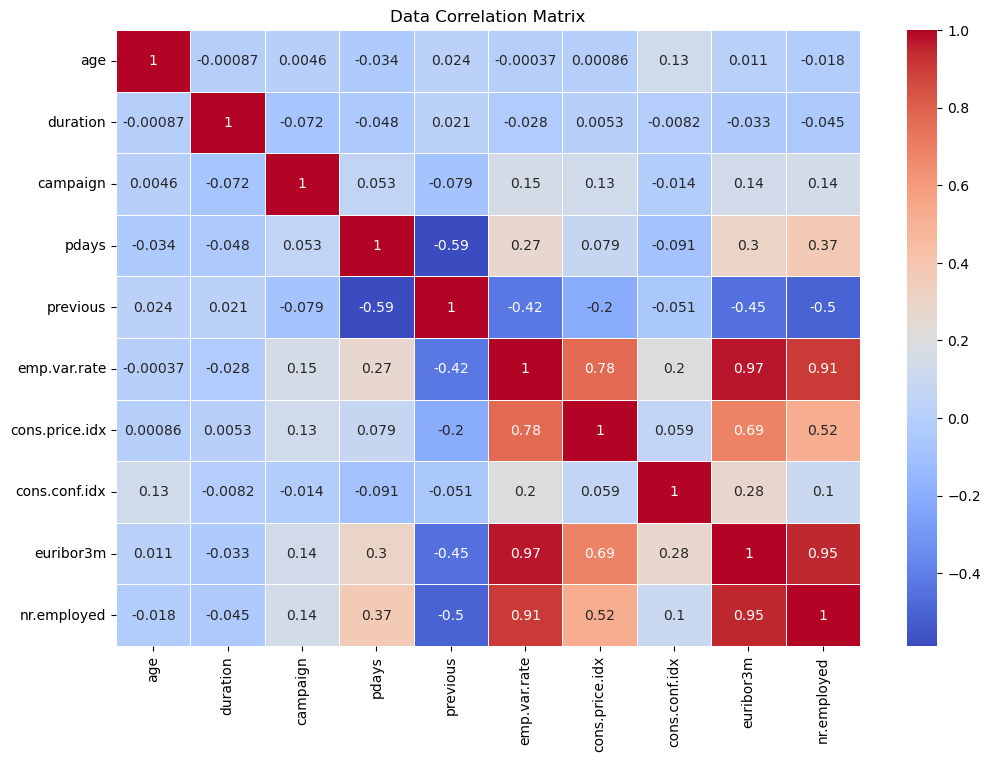

In [9]:
# heatmap on correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Data Correlation Matrix")
plt.show()

#### Histogram to find outliers

In [10]:
columns = list(df.columns)
del columns[-1]

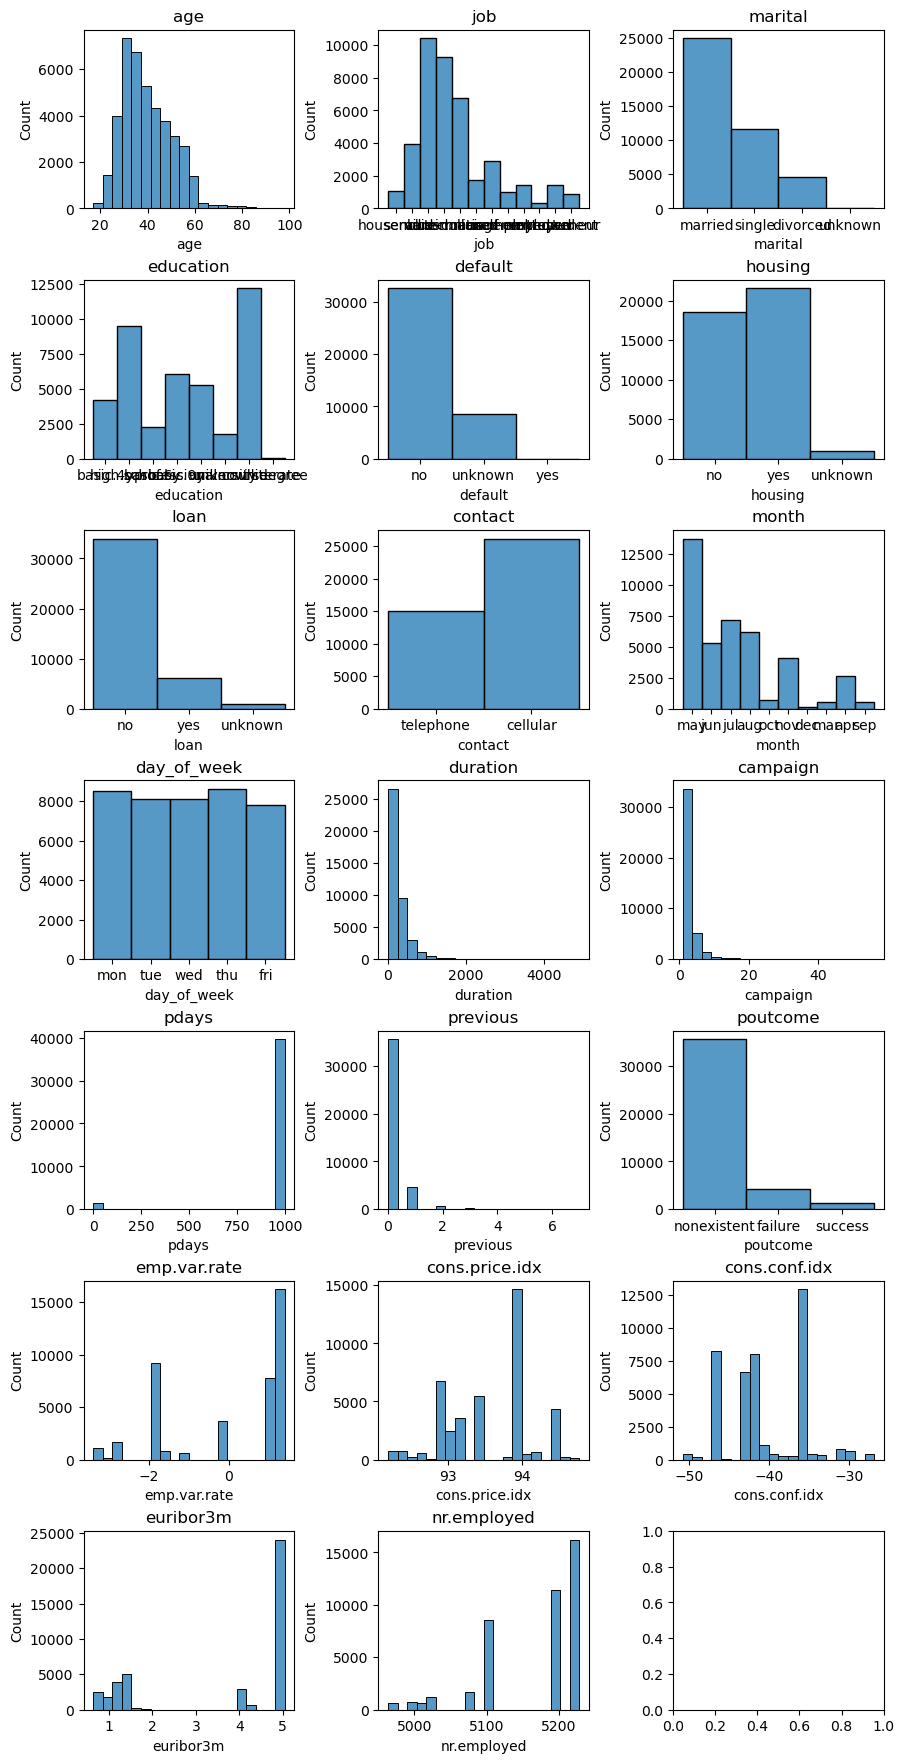

In [11]:
fig, axes = plt.subplots(7, 3, figsize=(10, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4,hspace=0.4)
k =0

for i in range(0,8):
    for j in range(0,3):
        if k==20:
            break
        sns.histplot(data=df, x=columns[k], ax=axes[i,j], bins=20).set(title=columns[k])
        k = k+1
        
        

<B>Note</B>: Some of the columns include outliers are age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,etc.

### Data Preparation

#### Drop Duplicates

In [12]:
data = df.copy()
data = data.drop_duplicates()
data.shape

(41176, 21)

In [13]:
# columns that we found having more outliers from histogram

outlier_columns = ['age','pdays','previous','duration','campaign','cons.conf.idx']

In [14]:
# function to remove outliers using IQR (Interquartile Range) method

def remove_outliers(df, out_cols, T=1.5, verbose=True):
    # Copy of df
    new_df = df.copy()
    init_shape = new_df.shape
    # For each column
    for c in out_cols:
        q1 = new_df[c].quantile(.25)
        q3 = new_df[c].quantile(.75)
        col_iqr = q3 - q1
        col_max = q3 + T * col_iqr
        col_min = q1 - T * col_iqr
        # Filter data without outliers and ignoring nan
        filtered_df = new_df[(new_df[c] <= col_max) & (new_df[c] >= col_min)]
        if verbose:
            n_out = new_df.shape[0] - filtered_df.shape[0] 
            print(f" Columns {c} had {n_out} outliers removed")
        new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
    return new_df

# data without outlier
data_no_outlier=remove_outliers(data,outlier_columns)

 Columns age had 468 outliers removed
 Columns pdays had 1417 outliers removed
 Columns previous had 4006 outliers removed
 Columns duration had 2559 outliers removed
 Columns campaign had 2158 outliers removed
 Columns cons.conf.idx had 213 outliers removed
Data reduced by 10821 lines, or 26.28 %


<B>Note</B>: Function determined and removed 26% of data based on the specified columns and iqr range

In [15]:
data_no_outlier.shape

(30355, 21)

In [16]:
data_no_outlier.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Histogram to check outlier upon removal

In [17]:
columns = list(df.columns)
del columns[-1]

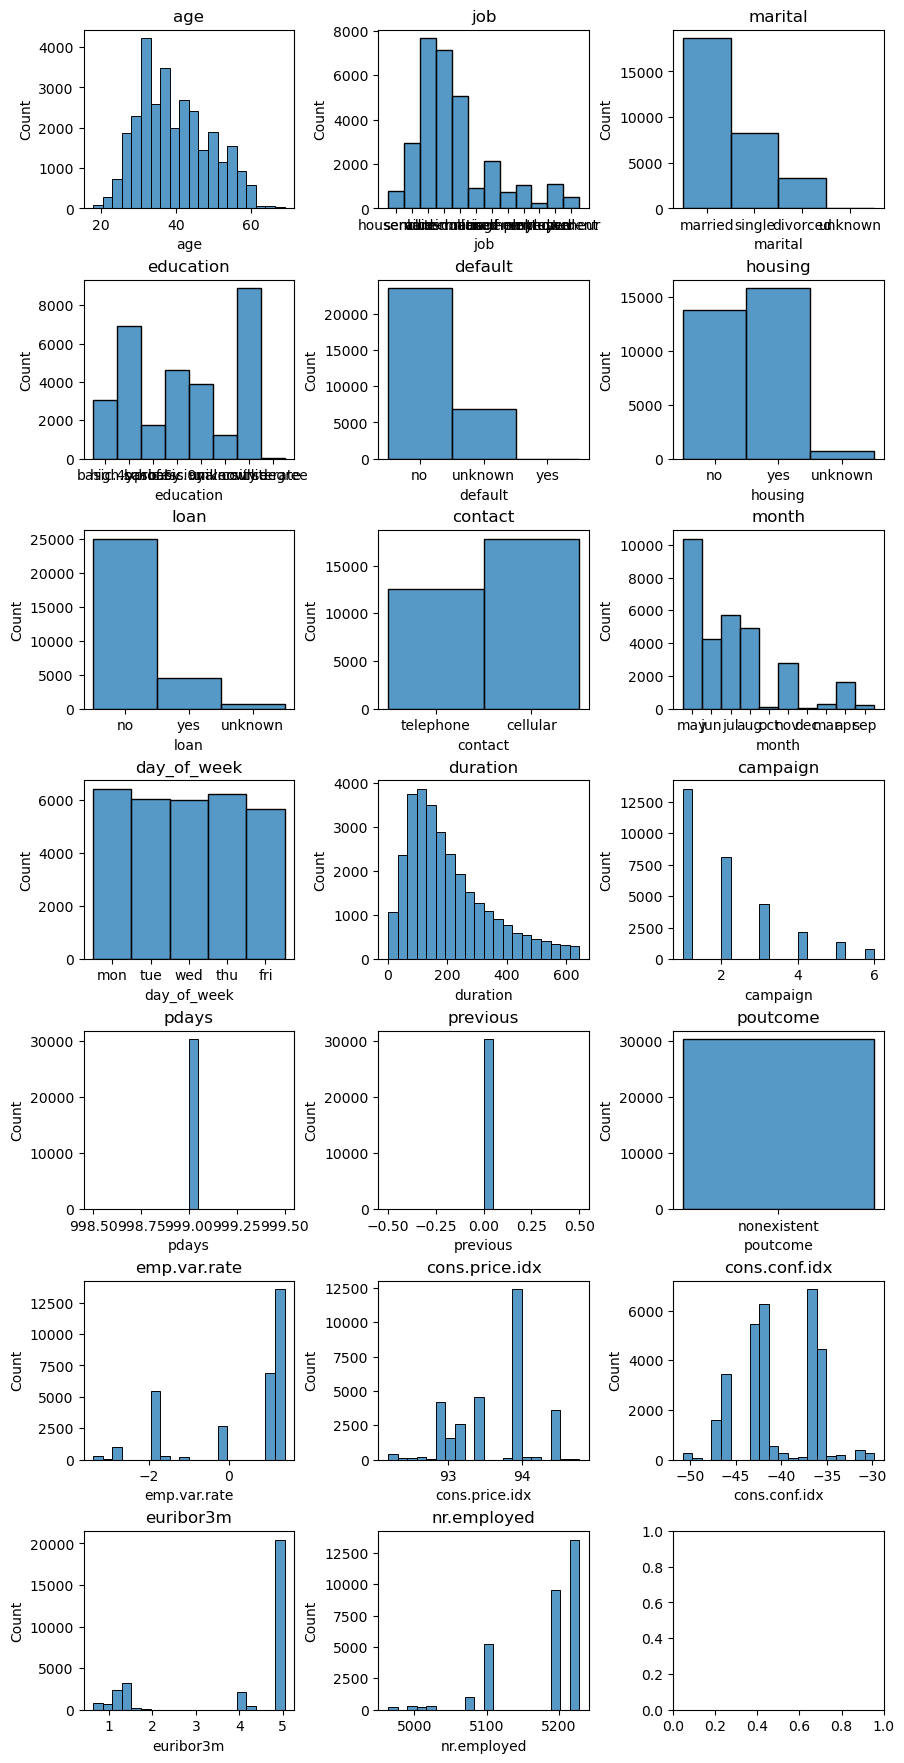

In [18]:
fig, axes = plt.subplots(7, 3, figsize=(10, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4,hspace=0.4)
k =0

for i in range(0,8):
    for j in range(0,3):
        if k==20:
            break
        sns.histplot(data=data_no_outlier, x=columns[k], ax=axes[i,j], bins=20).set(title=columns[k])
        k = k+1

<B>Note</B>: We could see the outliers are mostly removed

In [19]:
#### Ignore calls where atleast 30 seconds not spent

In [20]:
data_clean = data_no_outlier[(data_no_outlier['duration'] > 30)]

In [21]:
data_clean.shape

(29354, 21)

In [22]:
data_clean['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [23]:
data_clean['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [24]:
data_clean['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [25]:
data_clean['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

<B>Note</B>: A small amount of data cleaned up ignoring short calls

### Data Encoding

#### Binary Encoding

A simple technique that is used when only 2 unique values are present in a column, as a preparation for model run.

In [26]:
# "yes" and "no" values are present in below columns
columns_binary = ['default','housing','loan','y'] 

# define mapping
mapping_binary = {'yes': 1, 'no': 0}

# apply encoding
for column in columns_binary:
    data_clean[column] = data_clean[column].map(mapping_binary)
    
data_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
# Address null values generated for each columns during labeling due to 'unknown' values by filling with mode value

default_mode = data_clean['default'].mode()[0]
data_clean['default'].fillna(default_mode, inplace=True)

housing_mode = data_clean['housing'].mode()[0]
data_clean['housing'].fillna(housing_mode, inplace=True)

loan_mode = data_clean['loan'].mode()[0]
data_clean['loan'].fillna(loan_mode, inplace=True)

In [28]:
data_clean['default'].unique()

array([0., 1.])

In [29]:
data_clean['housing'].unique()

array([0., 1.])

In [30]:
data_clean['loan'].unique()

array([0., 1.])

<B>Note</B>: Binary encoding has helped encode 4 columns ('default','housing','loan','y') with binary values. Also, the null values generated due to 'unknown' value has been addressed using mode value.

#### Label Encoding (auto assignment)

A technique that is used when more then 2 unique values are present in a column, as a preparation for model run.
One Hot encoding is an alternate, but that would introduce several additional columns if there are many unique values.

In [31]:
# Initialize
label_encoder = LabelEncoder()

# Columns to undergo encoding
columns_label = ['job','marital','education', 'poutcome','contact']

# Loop through the specified columns and apply the mapping
for column in columns_label:
    data_clean[column] = label_encoder.fit_transform(data_clean[column])

data_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0.0,0.0,0.0,1,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0.0,0.0,0.0,1,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0.0,1.0,0.0,1,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0.0,0.0,0.0,1,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0.0,0.0,1.0,1,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


#### Label Encoding (manual assignment)

A regular label encoding technique but instead label encoder from sklearn, we use a manual way to assign the mapping for multiple unique values.

In [32]:
# create labels for 'day_of_week'

mapping_week = {'sun': 0, 'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,'fri': 5, 'sat': 6}

# apply mapping
data_clean['day_of_week'] = data_clean['day_of_week'].map(mapping_week)

# create labels for 'month'

mapping_month = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,'nov': 11, 'dec': 12
}

# apply mapping
data_clean['month'] = data_clean['month'].map(mapping_month)

data_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0.0,0.0,0.0,1,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0.0,0.0,0.0,1,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0.0,1.0,0.0,1,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0.0,0.0,0.0,1,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0.0,0.0,1.0,1,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [33]:
data_clean.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<B>Note</B>: Ensured no null values after label encoding.

### Feature Selection

It is important to select the most useful features in the final dataset before executing the model to ensure accuracy.

In [34]:
# First step involves creating 2 variables one for all features and another for the target.

X = data_clean.drop('y', axis=1)
y = data_clean['y']

#### PCA Analysis

PCA analysis helps narrow down to the minimal number of features that contributes to the maximum impact on target feature. It involves the following steps.

- Use standard scaler to scale all the features to the same scale.
- Plot # of components against explained variance ratio to find until where it is effective.
- PCA loadings are the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed. It helps identify which variables have the largest effect on each component.
- Select top n features and prepare dataset for modeling.


Text(0, 0.5, 'explained_variance_ratio_')

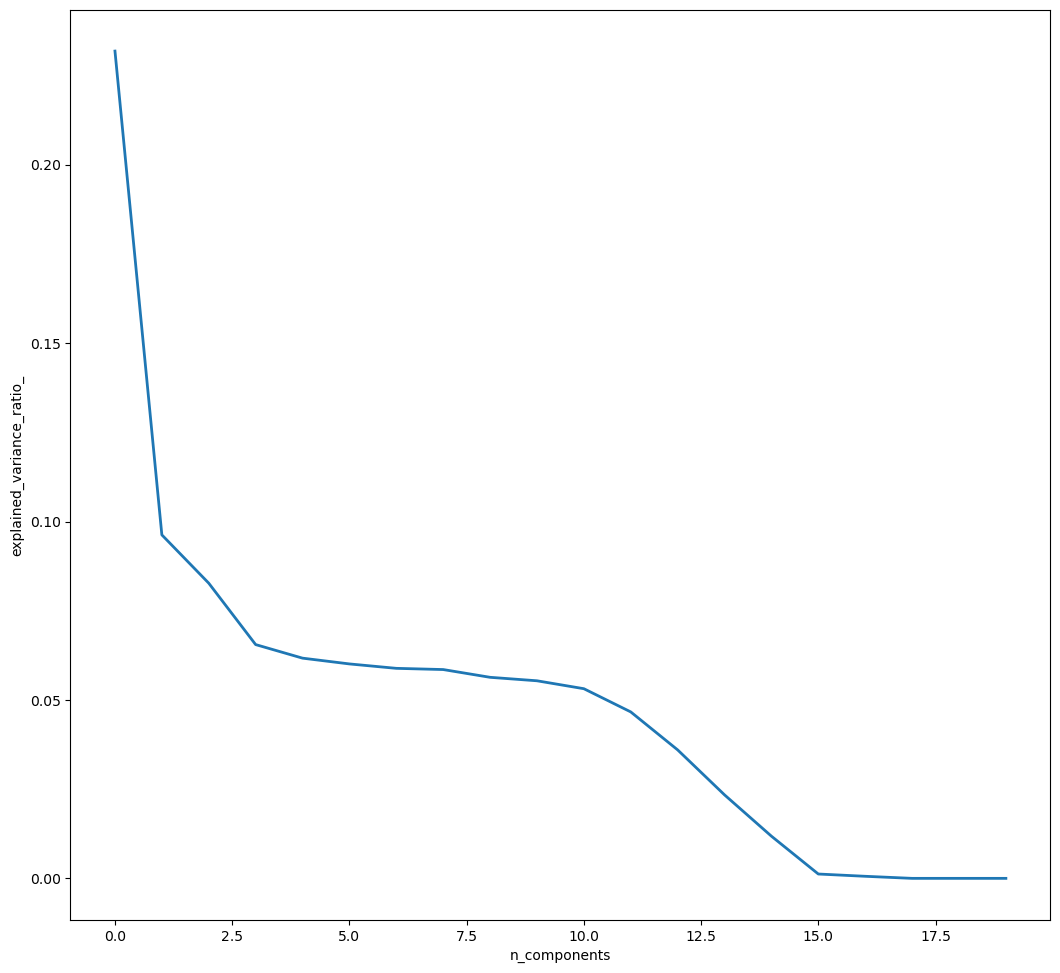

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [36]:
loadings = pca.components_[15]
loadings

array([ 1.94543849e-03, -6.86741286e-04,  1.57368658e-03, -4.27053325e-04,
       -4.36835504e-04, -3.28626873e-03, -8.62856385e-04,  1.00840452e-01,
        4.12154953e-02, -2.40418383e-03,  1.32776107e-03, -2.18702532e-03,
        6.24500451e-17, -9.54097912e-18, -9.62229428e-19,  6.72770793e-01,
       -3.40236591e-01, -1.61148211e-01,  1.87620544e-01, -5.98790296e-01])

In [37]:
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})
loadings_df

,Feature,Loading
0,age,1.945438e-03
1,job,-6.867413e-04
2,marital,1.573687e-03
3,education,-4.270533e-04
4,default,-4.368355e-04
5,housing,-3.286269e-03
6,loan,-8.628564e-04
7,contact,1.008405e-01
8,month,4.121550e-02
9,day_of_week,-2.404184e-03


In [38]:
loadings_df['Absolute_Loading'] = loadings_df['Loading'].abs()
loadings_df = loadings_df.sort_values(by='Absolute_Loading', ascending=False)

In [39]:
print(loadings_df)

           Feature       Loading  Absolute_Loading
15    emp.var.rate  6.727708e-01      6.727708e-01
19     nr.employed -5.987903e-01      5.987903e-01
16  cons.price.idx -3.402366e-01      3.402366e-01
18       euribor3m  1.876205e-01      1.876205e-01
17   cons.conf.idx -1.611482e-01      1.611482e-01
7          contact  1.008405e-01      1.008405e-01
8            month  4.121550e-02      4.121550e-02
5          housing -3.286269e-03      3.286269e-03
9      day_of_week -2.404184e-03      2.404184e-03
11        campaign -2.187025e-03      2.187025e-03
0              age  1.945438e-03      1.945438e-03
2          marital  1.573687e-03      1.573687e-03
10        duration  1.327761e-03      1.327761e-03
6             loan -8.628564e-04      8.628564e-04
1              job -6.867413e-04      6.867413e-04
4          default -4.368355e-04      4.368355e-04
3        education -4.270533e-04      4.270533e-04
12           pdays  6.245005e-17      6.245005e-17
13        previous -9.540979e-1

In [40]:
top_n = 6
selected_features = loadings_df.iloc[:top_n]['Feature']
X_selected = X[selected_features]

In [41]:
selected_features

15      emp.var.rate
19       nr.employed
16    cons.price.idx
18         euribor3m
17     cons.conf.idx
7            contact
Name: Feature, dtype: object

### Modeling

#### Split into Train & Test dataset

In [42]:
# Split the data into 2 parts for training and test with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#### Logistic Regression 

In [347]:
# choose hyper parameter values to use
logistic_regression_parameters = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet']
}

# create a logistic regression model
lr = LogisticRegression()

# create a grid search object
lr_grid = GridSearchCV(lr, logistic_regression_parameters, scoring='accuracy')

# fit the model with data
lr_grid.fit(X_train, y_train)

# make prediction
lr_predict = lr_grid.predict(X_test)

# calculate various metrics (accuracy, precision, recall, f1)
lr_accuracy = accuracy_score(y_test, lr_predict)
lr_precision = precision_score(y_test, lr_predict)
lr_recall = recall_score(y_test, lr_predict)
lr_f1 = f1_score(y_test, lr_predict)

In [348]:
print(lr_accuracy, lr_precision, lr_recall, lr_f1)

0.940044285470959 0.3170731707317073 0.03857566765578635 0.06878306878306878


#### Decision Tree

In [352]:
# choose hyper parameter values to use
decision_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# create a decision tree model
dt = DecisionTreeClassifier()

# create a grid search object
dt_grid = GridSearchCV(dt, decision_parameters, scoring='accuracy')

# fit the model with data
dt_grid.fit(X_train, y_train)

# make prediction
dt_predict = dt_grid.predict(X_test)

# calculate various metrics (accuracy, precision, recall, f1)
dt_accuracy = accuracy_score(y_test, dt_predict)
dt_precision = precision_score(y_test, dt_predict)
dt_recall = recall_score(y_test, dt_predict)
dt_f1 = f1_score(y_test, dt_predict)

In [353]:
print(dt_accuracy, dt_precision, dt_recall, dt_f1)

0.9449838187702265 0.5714285714285714 0.1661721068249258 0.2574712643678161


#### K Nearest Neighbors

In [354]:
# choose hyper parameter values to use
knn_parameters = {
    'n_neighbors': [3, 5, 7, 9]
}

# create a K Neighbors model
knn = KNeighborsClassifier()

# create a grid search object
knn_grid = GridSearchCV(knn, knn_parameters, scoring='accuracy')

# fit the model with data
knn_grid.fit(X_train, y_train)

# make prediction
knn_predict = knn_grid.predict(X_test)

# calculate various metrics (accuracy, precision, recall, f1)
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_precision = precision_score(y_test, knn_predict)
knn_recall = recall_score(y_test, knn_predict)
knn_f1 = f1_score(y_test, knn_predict)

In [355]:
print(knn_accuracy, knn_precision, knn_recall, knn_f1)

0.9405552716743315 0.46296296296296297 0.22255192878338279 0.30060120240480964


#### SVC (Support Vector Classifier) 

In [ ]:
# choose hyper parameter values to use
svc_parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# create a svc model
svc = SVC()

# create a grid search object
svc_grid = GridSearchCV(svc, svc_parameters, scoring='accuracy')

# fit the model with data
svc_grid.fit(X_train, y_train)

# make prediction
svm_predict = svc_grid.predict(X_test)

# calculate various metrics (accuracy, precision, recall, f1)
svm_accuracy = accuracy_score(y_test, svm_predict)
svm_precision = precision_score(y_test, svm_predict)
svm_recall = recall_score(y_test, svm_predict)
svm_f1 = f1_score(y_test, svm_predict)

In [45]:
print(svm_accuracy, svm_precision, svm_recall, svm_f1)

0.9322091636859138 0.3857677902621723 0.3056379821958457 0.3410596026490066


#### Results Comparison

In [ ]:
print(lr_accuracy, lr_precision, lr_recall, lr_f1)
print(dt_accuracy, dt_precision, dt_recall, dt_f1)
print(knn_accuracy, knn_precision, knn_recall, knn_f1)

0.940044285470959 0.3170731707317073 0.03857566765578635 0.06878306878306878
0.9449838187702265 0.5714285714285714 0.1661721068249258 0.2574712643678161
0.9405552716743315 0.46296296296296297 0.22255192878338279 0.30060120240480964
0.9322091636859138 0.3857677902621723 0.3056379821958457 0.3410596026490066

Logistic Regression: Produced good accuracy, but low precision. Comparably good with recall and f1 scores.
Decision Tree: Produced good accuracy, but low recall and f1 score. Comparably good precision score.
K Neighbors: Produced good accuracy, but low recall and f1 score. Comparably better with precision score.
SVC: Produced good accuracy, and a moderate scores for precision, recall and f1.

Overall best would be knn for the given problem on comparison.

#### Next Steps & Recommendations

- K Neighbors is the suggested model to use with this prediction problem.
- Perform additional data exploration to understand the data better.
- Data cleaning process has resulted in a significant loss of data. Try to reduce the percentage of upper and lower bounds that we have elimanted in the outliers.
- Choose alternate feature selection techniques such as Random Forest Regressor to see how the model performs when a dataset is built using the resulting features.
- Try using more combinations for hyper parameters and use a machine with high system capacity to run the models in short duration and arrive at a best hyper parameter list. 